In [19]:
import tensorflow as tf

In [20]:
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [21]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
              'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [27]:
train_images.shape

(60000, 28, 28)

In [28]:
train_labels.shape

(60000,)

In [29]:
test_images.shape

(10000, 28, 28)

In [31]:
test_labels.shape

(10000,)

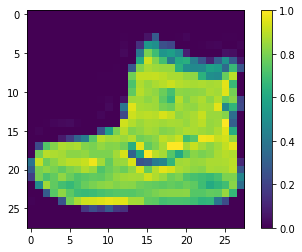

'Ankle boot'

In [42]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
class_names[train_labels[0]]

In [43]:
train_images = train_images/255.0
test_images = test_images/255.0

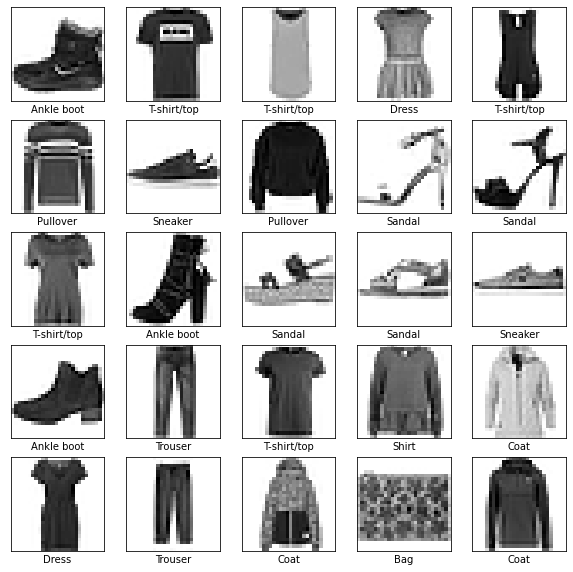

In [45]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [49]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                                                                metrics=['accuracy'])

In [50]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0969 - accuracy: 0.6568
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6403 - accuracy: 0.7700
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5635 - accuracy: 0.7994
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5209 - accuracy: 0.8166
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4930 - accuracy: 0.8264
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4727 - accuracy: 0.8345
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4578 - accuracy: 0.8391
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4453 - accuracy: 0.8430
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4357 - accuracy: 0.8456
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.426

In [51]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.4559 - accuracy: 0.8355 - 541ms/epoch - 2ms/step


In [53]:
print('Test Accuracy:', test_acc)

Test Accuracy: 0.8355000019073486


In [54]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [55]:
predictions = probability_model.predict(test_images)

In [56]:
predictions[0]

array([5.3540748e-07, 4.5511850e-08, 3.6015715e-06, 2.8710072e-06,
       4.9325863e-06, 1.3575692e-01, 1.6578846e-05, 2.8870869e-01,
       6.3479710e-03, 5.6915790e-01], dtype=float32)

In [60]:
np.argmax(predictions[0])

9

Test images predictions


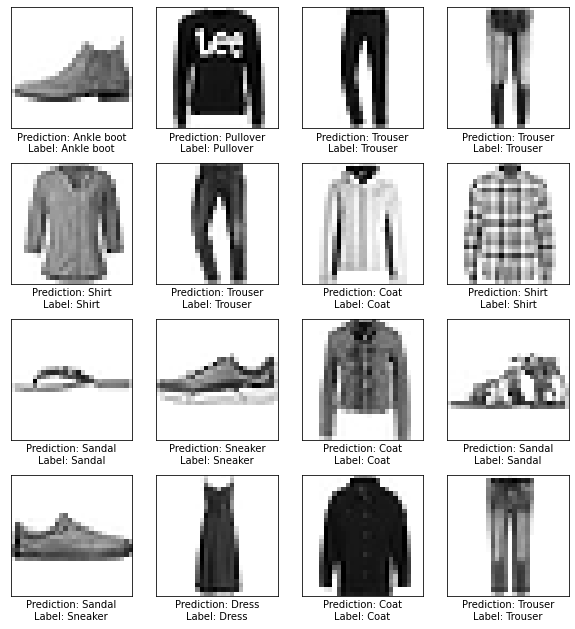

In [86]:
print("Test images predictions")
plt.figure(figsize=(10,11))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Prediction: "+str(class_names[np.argmax(predictions[i])]) + "\nLabel: "+str(class_names[test_labels[i]]))

plt.show()
    